## Plot differences in SPL between belugas and narwhals

In [58]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

### Load Data

In [59]:
# import beluga and narwhal sound pressure level (SPL) statistics
csv_dir = 'data/SPL_difference/1hr/'

# Kong Oscar
kong_beluga_spec  = pd.read_csv(csv_dir + 'kong_beluga_spectral_data_1hr.csv')
kong_narwhal_spec = pd.read_csv(csv_dir + 'kong_narwhal_spectral_data_1hr.csv')
kong_noise_spec   = pd.read_csv(csv_dir + 'kong_noise_spectral_data_1hr.csv')

# Fisher Islands
fish_beluga_spec  = pd.read_csv(csv_dir + 'fish_beluga_spectral_data_1hr.csv')
fish_narwhal_spec = pd.read_csv(csv_dir + 'fish_narwhal_spectral_data_1hr.csv')
fish_noise_spec   = pd.read_csv(csv_dir + 'fish_noise_spectral_data_1hr.csv')

In [60]:
# remove the one noise beluga event
# kong_beluga_spec = kong_beluga_spec.iloc[1:3,]

In [61]:
# join dataframes from both sites
beluga_spec  = pd.concat([kong_beluga_spec, fish_beluga_spec])
narwhal_spec = pd.concat([kong_narwhal_spec, fish_narwhal_spec])
noise_spec   = pd.concat([kong_noise_spec, fish_noise_spec])

In [62]:
## prepare dataframes to plot violin plots
df_narwhal = pd.melt(narwhal_spec, id_vars='evNum',\
                     value_vars=narwhal_spec.loc[:,'band_diff_16to23_dB':'band_diff_23to46_dB'],\
                     var_name='band', value_name='dB')

df_beluga = pd.melt(beluga_spec, id_vars='evNum',\
                    value_vars=beluga_spec.loc[:,'band_diff_16to23_dB':'band_diff_23to46_dB'],\
                    var_name='band', value_name='dB')

df_noise = pd.melt(noise_spec, id_vars='evNum',\
                    value_vars=noise_spec.loc[:,'band_diff_16to23_dB':'band_diff_23to46_dB'],\
                    var_name='band', value_name='dB')

In [63]:
freq_array = np.arange(0,72000,281.25)
beluga_avSpec = beluga_spec.loc[:,'X1':'X256'] + 173 # add clipping level
narwhal_avSpec = narwhal_spec.loc[:,'X1':'X256'] + 173 # add clipping level
noise_avSpec = noise_spec.loc[:,'X1':'X256'] + 173 # add clipping level

Calculate average spectra for each group across events

In [64]:
def calculate_avg_spec(spec_df):
    # convert to linear scale and calculate mean across all events (rows)
    avSpec_all_linear = (10**(spec_df/20)).mean(axis=0)
    # convert back to dB (log scale)
    avSpec_all = 20*np.log10(avSpec_all_linear)
    return(avSpec_all)

In [65]:
## beluga events
beluga_avSpec_all = calculate_avg_spec(beluga_avSpec)
narwhal_avSpec_all = calculate_avg_spec(narwhal_avSpec)
noise_avSpec_all = calculate_avg_spec(noise_avSpec)

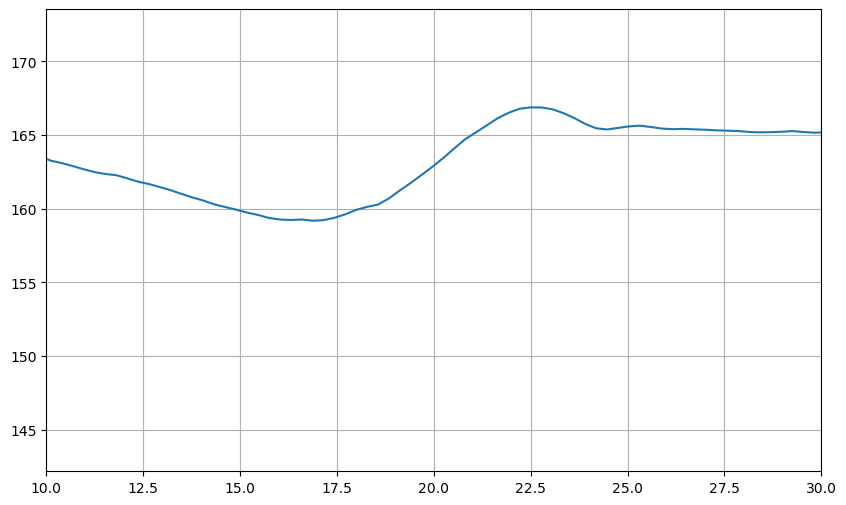

In [66]:
plt.plot(freq_array/1000,narwhal_avSpec_all)
plt.xlim(10,30)
plt.grid()

Plot

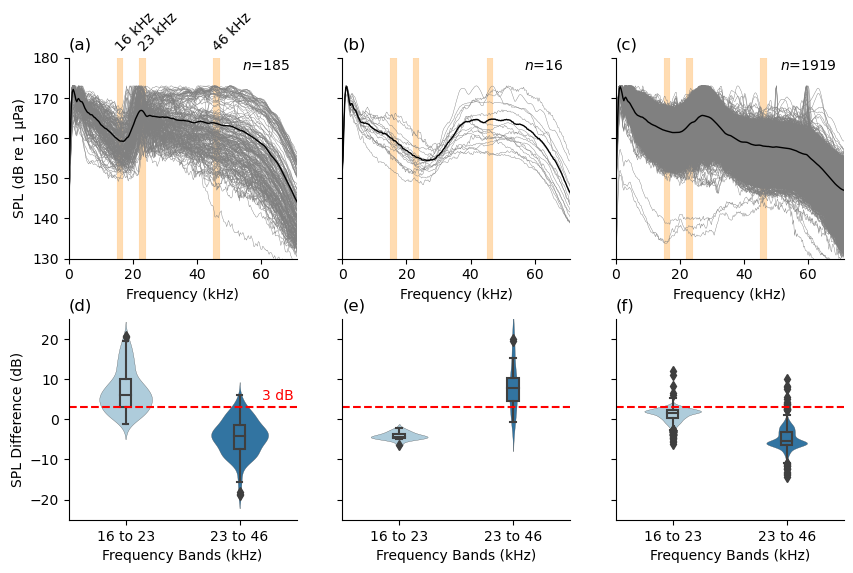

In [67]:
plt.rcParams['figure.figsize'] = (10,6)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
plt.subplots_adjust(hspace=0.3)

## top two plots: mean power spectra for each species

## narwhal events
for i in range(len(narwhal_avSpec.iloc[:,0])):
    ax1.plot(freq_array/1000, narwhal_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax1.plot(freq_array/1000,narwhal_avSpec_all,'k', linewidth=1)

## beluga events
for i in range(len(beluga_avSpec.iloc[:,0])):
    ax2.plot(freq_array/1000, beluga_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array/1000,beluga_avSpec_all,'k', linewidth=1)
    
## noise events
for i in range(len(noise_avSpec.iloc[:,0])):
    ax3.plot(freq_array/1000, noise_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax3.plot(freq_array/1000,noise_avSpec_all,'k', linewidth=1)

ax1.set_ylabel("SPL (dB re 1 μPa)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_narwhal['band'],y=df_narwhal['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax4)
ax4.set_ylabel("SPL Difference (dB)")
ax4.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_beluga['band'],y=df_beluga['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax5);
sns.boxplot(x='band', y='dB', data=df_beluga, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax5)

sns.violinplot(x=df_noise['band'],y=df_noise['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5, ax=ax6);
sns.boxplot(x='band', y='dB', data=df_noise, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax6)

for ax in (ax1,ax2, ax3):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(130,180)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ax.axvspan(15, 17, alpha=0.3, color='darkorange',linewidth=0.1);
    ax.axvspan(22, 24, alpha=0.3, color='darkorange',linewidth=0.1);
    ax.axvspan(45, 47, alpha=0.3, color='darkorange',linewidth=0.1);

for ax in (ax4,ax5,ax6):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 23", "23 to 46"])
    ax.set_xlabel("Frequency Bands (kHz)")
    ax.set_ylim(-25,25)
    ax.axhline(y = 3, color = 'r', linestyle = '--')

for ax in (ax2,ax3,ax5,ax6):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)","(e)","(f)"]
for ax, label in zip([ax1,ax2,ax3,ax4,ax5,ax6],labels):
    ax.set_title(label, loc='left', size=12)

# add sample size number in upper right of each plot
ax1.text(69,178,'$\it{n}$=' + str(len(narwhal_spec['evNum'])), ha='right', va='center')
ax2.text(69,178,'$\it{n}$=' + str(len(beluga_spec['evNum'])),  ha='right', va='center')
ax3.text(69,178,'$\it{n}$=' + str(len(noise_spec['evNum'])),   ha='right', va='center')

# add frequency band numbers
ax1.text(14,181,'16 kHz', ha='left', va='bottom', rotation=45);
ax1.text(21,181,'23 kHz', ha='left', va='bottom', rotation=45);
ax1.text(44,181,'46 kHz', ha='left', va='bottom', rotation=45);

# ax1.text(60,181,'$\it{n}$ det=' + f"{narwhal_spec['n_dets'].sum():,}", ha='left', va='center')
# ax2.text(60,181,'$\it{n}$ det=' + f"{beluga_spec['n_dets'].sum():,}",  ha='left', va='center')
# ax3.text(60,181,'$\it{n}$ det=' + f"{noise_spec['n_dets'].sum():,}",   ha='left', va='center')

ax4.text(1.2,4,'3 dB', ha='left', va='bottom', color='r');

plt.savefig('figures/spl_diff_fig.png', bbox_inches='tight', dpi=300, facecolor='white')

In [36]:
import scipy.stats as stats

In [40]:
# Performing the paired sample t-test
stats.ttest_rel(beluga_spec['band_diff_16to22_dB'], beluga_spec['band_diff_22to46_dB'])

Ttest_relResult(statistic=-7.078930165957223, pvalue=3.753311193917352e-06)

In [41]:
stats.ttest_rel(narwhal_spec['band_diff_16to22_dB'], narwhal_spec['band_diff_22to46_dB'])

Ttest_relResult(statistic=19.53361192918216, pvalue=9.735078727845926e-47)

In [42]:
stats.ttest_rel(noise_spec['band_diff_16to22_dB'], noise_spec['band_diff_22to46_dB'])

Ttest_relResult(statistic=72.18136183235518, pvalue=0.0)